# ODE IVP

Solve $\frac{dy}{dt} = f(t,y)$ with given $y_0$

## Euler method
$$
y_{n+1} = y_n + f\Delta t
$$
Total error is proportional to $\Delta t$

In [2]:
# forward euler algorithm
import numpy as np
def ForwardEulerInt(f, t_end, N, y_init=0, t_start=0):
    y = [y_init]
    dt = (t_start - t_end) / N
    t = np.linspace(t_start, t_end, N)
    for n in range(N):
        y.append(y[-1] + dt * f(y[-1], t[n]))
    return np.array(y)

## Predictor-Corrector Method
- Method: 
    1. Find $y_{n+1}$ by Eular Method
    2. Calculate $f_{n+1}$, and the iterative formula is 
        $$
        y_{n+1} = y_n + \frac{h}{2}(f_n + f_{n+1})
        $$
- Error: $O(h^3)$   (Each step)  
    $O(h^2)$ (Total)

## Runge-Kutta Algorithm
rk2: $$y(t+\Delta t) = y(t) + \Delta t[Af(t,y(t))+Bf(t+P\Delta t,y+Q\Delta f(t,y(t)))]$$

Different rk2 method has unique *A,B,P,Q*

1. Modified Euler-Cauchy: A = 0, B = 1 ,P = Q = $\frac{1}{2}$

2. Heun's method (Picard's method): A = B = $\frac{1}{2}$, P = Q = 1

3. Ralston's Method: A = $\frac{1}{3}$, B = $\frac{2}{3}$, P = Q = $\frac{3}{4}$


In [3]:
def RK2Int(f, t_end, N, method="Heun", y_init=0, t_start=0):
    if method == "Eular": 
        A, B, P, Q = [0, 1, 0.5, 0.5]
    elif method == "Heun":
        A, B, P, Q = [0.5, 0.5, 1, 1]
    elif method == "Ralston":
        A, B, P, Q = [1/3, 2/3, 3/4, 3/4]
    else:
        print("Unknown method!")
        exit(-1)    

    y = [y_init]
    dt = (t_start - t_end) / N
    t = np.linspace(t_start, t_end, N)
    for n in range(N):
        k1 = f(y[-1], t[n])
        k2 = f(y[-1] + Q*dt*k1, t[n] + P*dt)
        y.append(y[-1] + dt * (A * k1 + B * k2))

    return np.array(y)

In [4]:
def RK4Int(f, t_end, N, y_init=0, t_start=0):
    y = [y_init]
    dt = (t_start - t_end) / N
    t = np.linspace(t_start, t_end, N)
    for n in range(N):
        k1 = f(y[-1], t[n])
        k2 = f(y[-1] + 0.5*dt*k1, t[n] + 0.5*dt)
        k3 = f(y[-1] + 0.5*dt*k2, t[n] + 0.5*dt)
        k4 = f(y[-1] + dt*k3, t[n] + dt)
        y.append(y[-1] + dt * (k1 +  2 * k2 + 2 * k3 + k4)/6)
    return np.array(y)

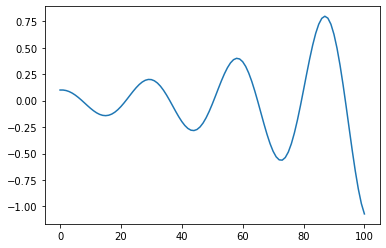

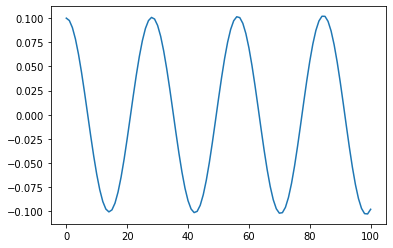

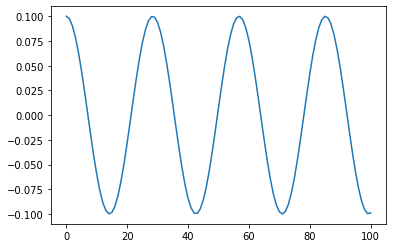

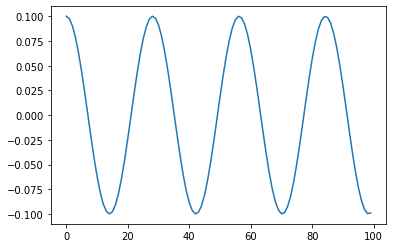

In [6]:
# test: harmonic oscillator
import matplotlib.pyplot as plt
from scipy.integrate import odeint

def HarmonicOscillator(theta, t):
    g = 9.8
    l = 0.5
    return np.array([theta[1], -g/l * theta[0]])

t_end = 5
N = 100
theta_init = [0.1, 0]

theta_eular = ForwardEulerInt(HarmonicOscillator, t_end, N, theta_init)
theta_rk2 = RK2Int(HarmonicOscillator, t_end, N, y_init=theta_init)
theta_rk4 = RK4Int(HarmonicOscillator, t_end, N, theta_init)
theta_scipy = odeint(HarmonicOscillator, theta_init, np.linspace(0, t_end, N))

plt.figure()
plt.plot(theta_eular[:, 0])
plt.figure()
plt.plot(theta_rk2[:, 0])
plt.figure()
plt.plot(theta_rk4[:, 0])
plt.figure()
plt.plot(theta_scipy[:, 0])
plt.show()

Explicit method: based on previous point(s) 

Implicit method: use future points being sought.